In [42]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
import time
from random import randrange
import matplotlib.pyplot as plt
from random import randint

In [54]:
def get_recommend_url(distance, indices, index, data):
    img = [[index, data['Image URL'][index]]]
    for i in range(1,len(distance.flatten())):
        idx = indices.flatten()[i]
        url = data['Image URL'].iloc[idx]
        img.append([idx,url])
    df = pd.DataFrame(img, columns = ['Index', 'URL'])
    return df

# display URL image by given a list of url
def display(url_list):
    from IPython.display import display, Markdown
    fig, ax = plt.subplots(3,2)
    import ipyplot
    ipyplot.plot_images(url_list, max_images = 100, img_width=150)
    print()
    # li = []
    # for i in range(len(url_list)):
    #     f = urllib2.urlopen(i)
    #     # li.append(Markdown("<img src=\""+url_list[i]+"\"  width='10%' height='10%'>"))
    #     li.append(Image(url = i, width=100, height=100))
    # display(li)


def train_model(data, n, metric, X, query_index, algo='brute'):
    start = time.time()
    model = NearestNeighbors(n_neighbors=n,
                            metric=metric,
                            algorithm=algo)
    model.fit(X)
    running_time = time.time() - start
    distances,indices= model.kneighbors(X.iloc[query_index,:].values.reshape(1,-1))
    return {"Sample Size": len(X), "Model": model, "Running Time": running_time, "Input_Item": None, "Recommended_Item": None}
    
def retrieval(distances, indices, query_index, data):
    img = get_recommend_url(distances, indices, query_index, data)['URL']

IndentationError: expected an indented block (2662116970.py, line 35)

In [9]:
sample_data = pd.read_csv('/Users/shuchenz/Desktop/Ops Con/ChangingRoom/Coding/Data/sample_data.csv')
metrics = ['cosine', 'euclidean', 'manhattan']

In [ ]:
recommended_num = 11 # first one will be the input item itself, so should input number of wanted recommendations + 1
for i in range(5):
    df_return = pd.DataFrame(columns = ["Sample Size", "Model","Running Time", "Input_Item", "Recommended_Item"])
    data_use = sample_data
    X = pd.DataFrame(data_use.drop(['In Stock', 'URL', 'Image URL', 'item_number', 'brand_code'], axis=1))
    X = pd.get_dummies(X)
    query_index = randrange(data_use.shape[0])
    for m in metrics:
        df_return = df_return.append(train_model(data_use,recommended_num,m,X,query_index), ignore_index = True)
df_return.to_csv('sample_out.csv')

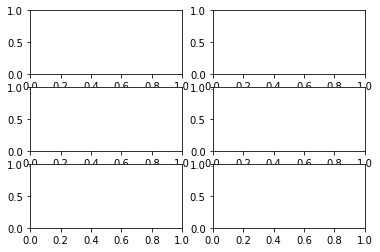

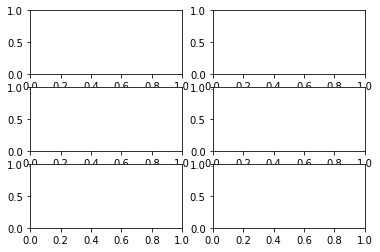

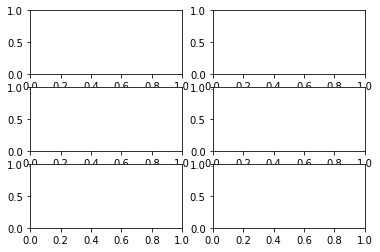

In [53]:
for index, row in df_return.iterrows():
    display([row['Input_Item']]+row['Recommended_Item'].tolist())